In [1]:
import pandas as pd

df = pd.read_excel("../output_data/nodes_10y_clean.xlsx")

dataset=[]
for i in range(100):
    ab=df.loc[i]["AB"]
    dataset.append(ab)


构建TF_IDF

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [
    "This is the first document.",
    "This is the second second document.",
    "And the third one.",
    "Is this the first document?",
]
# dataset=corpus
vectorizer = TfidfVectorizer(max_df=0.5, max_features=1000, min_df=2,use_idf=True,stop_words="english")
# vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dataset)
"""
max_df=0.5	忽略高频词（如果某个单词出现在 50% 以上的文档中，就认为它没区分度）
min_df=2	忽略低频词（某个词至少要出现在 2 个文档中，否则就丢弃）
max_features=1000	最多保留 1000 个重要特征
use_idf=True 计算IDF
"""
# 输出词袋[word1,word2,word3,...]
print(vectorizer.get_feature_names_out()) 
# 输出TF_IDF矩阵 [word1 in paper1,word2 in paper1 , ...]
print(X.toarray())



['2d' '3d' 'ability' 'able' 'academic' 'accuracy' 'accurate' 'achieve'
 'achieved' 'achieves' 'adaptive' 'addition' 'additional' 'additionally'
 'address' 'adopt' 'adopted' 'advances' 'advantages' 'aesthetic' 'affect'
 'aid' 'aim' 'aiming' 'algorithm' 'algorithmic' 'algorithms' 'alignment'
 'allow' 'allowing' 'allows' 'ambiguity' 'analysis' 'analysts' 'analytic'
 'analytical' 'analytics' 'analyze' 'analyzing' 'animation' 'appeal'
 'appear' 'appearance' 'applicable' 'application' 'applications' 'applied'
 'apply' 'approach' 'approaches' 'appropriate' 'ar' 'arbitrary'
 'architecture' 'area' 'arrays' 'art' 'article' 'aspects' 'assess'
 'assessed' 'assessing' 'assessment' 'assisted' 'associated' 'attention'
 'audio' 'augmented' 'authoring' 'automatic' 'automatically'
 'availability' 'available' 'aware' 'awareness' 'axis' 'based' 'baseline'
 'basic' 'behaviors' 'benefits' 'best' 'better' 'binary' 'body'
 'boundaries' 'build' 'building' 'built' 'called' 'camera' 'cameras'
 'capability' 'capa

对 TF-IDF 向量 X 进行 K-Means 聚类

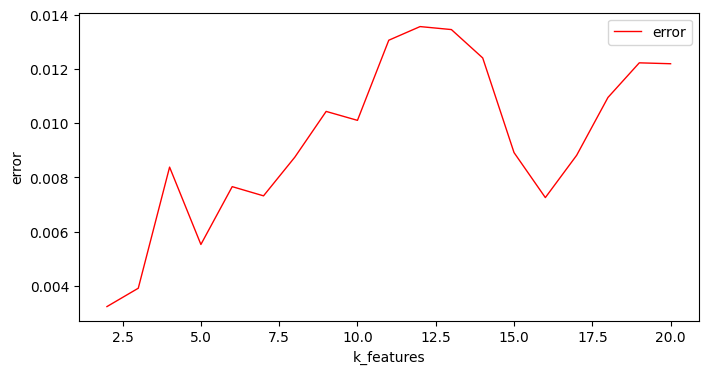

最佳 k 值: 12，最大轮廓系数: 0.0136


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

def find_best_K(X):
    """测试选择最优参数"""
    # dataset = loadDataset()
    # print("%d documents" % len(dataset))
    # X, vectorizer = transform(dataset, n_features=500)
    scores = []
    k_values=range(2,21)
    for k in k_values:
        km = KMeans(
            n_clusters=k,
            init="k-means++",
            max_iter=300,
            verbose=False,
            random_state=42,
        )
        # 聚类数；初始中心选择方法；最大迭代次数；不显示迭代详细日志；固定随机数
        cluster_labels = km.fit_predict(X)
        # 每一个样本被分配到的K
        silhouette_avg = silhouette_score(X, cluster_labels)
        # 计算轮廓系数:轮廓系数𝑠(𝑖)值越接近1表示样本𝑖聚类越合理
        scores.append(silhouette_avg)
    plt.figure(figsize=(8, 4))
    plt.plot(k_values, scores, label="error", color="red", linewidth=1)
    plt.xlabel("k_features")
    plt.ylabel("error")
    plt.legend()
    plt.show()

    # 找到最佳 k
    best_k = k_values[np.argmax(scores)]
    # 返回最优k；np.argmax是最大值的索引
    print(f"最佳 k 值: {best_k}，最大轮廓系数: {max(scores):.4f}")
    return best_k

final_k=find_best_K(X)

In [4]:
km = KMeans(
            n_clusters=final_k,
            init="k-means++",
            max_iter=300,
            verbose=False,
            random_state=42,
        )
cluster_labels = km.fit_predict(X)
# 所有样本所属簇的字典
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
# 每个簇的中心点：相对于所有特征的均值（相对于词袋）
# 每一行表示一个簇的中心点，即该簇所有样本在每个特征维度（单词）的均值 从大到小排列，值为其序号
feature_words = vectorizer.get_feature_names_out()

for i in range(final_k):
    print("Topic %d:" % i, end='')
    # 输出前十个特征词[第i个簇,前十个特征索引]
    for ind in order_centroids[i, :10]:
        print(" %s" % feature_words[ind], end="")

Topic 0: fluid sph particle particles media solid simulation simulations casting rayTopic 1: audio line flows synthesis generation motion scale large methods graduallyTopic 2: data model analysis dr time dimensional algorithm visual varying modelsTopic 3: networks network neural manual uncertainty features deep flow surfaces fieldTopic 4: motion flow method scene video body poses human animation scenesTopic 5: display displays view haptic focus cues links fov encoding wornTopic 6: visualization data visualizations design interactive practitioners exploration research future studyTopic 7: vr locomotion techniques cybersickness testbed scenarios virtual users performance userTopic 8: image method rendering curves regions light representation field 3d resolutionTopic 9: ar guidance conversational analytical design analytics user behaviors impacts systemsTopic 10: features mesh point surface ensemble points parameter subdivision arbitrary geometricTopic 11: layout process tools alignment 2